### <center><h1>Laboratorium 12-14</h1></center>

Dane zawierają informacje dotyczące rodzaju pokrycia terenu na obszarze Narodowego Parku Roosevelta w północnym Colorado.
Każdy rekord zawiera informacje dotyczące powierzchni 30mx30m.
Pierwsze 10 kolumn zawiera informacje dotyczące odpowiednio(ad. 3): 
0. wysokość nad poziomem morza
1. Azymut - wartość wyrażona w kątach
2. Nachylenie terenu
3. Horyzontalną odległość od wody
4. Wertykalną odległość od wody
5. Horyzontalna odległość od najbliższej jezdni
6. Zacienienie o godzinie 9 (wartość 0 -255)
7. Zacienienie o godzinie 12 (wartość 0 -255)
8. Zacienienie o godzinie 15 rano (wartość 0 -255)
9. Horyzontalna odległość do punktu w którym może wybuchnąć pożar

Kolumny od 10 do 13 zawierają informację nt. rodzaju dzikiej przyrody występującej na danym skrawku badanej ziemi.
Tylko 1 z tych 4 kolumn ma wartość 1, pozostałe mają wartość 0 - dany obszar może być zaklasyfikowany tylko jako jeden z tych 4 rodzaji.

W przypadku kolumn 14-53 jest podobnie jak w poprzednim przypadku - tylko 1 z tyh kolumn może mieć wartość pozytywną.
Kolumny te zawierają informację nt. typu gleby.

Ostatnia kolumna to etykieta która mówi jaki typ pokrycia występuje na danym obszarze.
Następujące etykiety odpowiadają następującym typom:
1. Spruce/Fir - Świerk/Jodła
2. Lodgepole Pine - Sosna wydmowa
3. Ponderosa Pine - Sosna żółta
4. Cottonwood/Willow - Topola/wierzba
5. Aspen - Osika
6. Douglas-fir - Daglezje, jedlica zielona
7. Krummholz - Krzywulec - coś a'la kosodrzewina ale nie do końca

Dla poszczególnych gatunków w bazie danych znajduje się następująca ilość rekordów(ad. 3):
1. 211840 
2. 283301
3. 35754
4. 2747
5. 9493
6. 17367
7. 20510

link do bazy danych: https://archive.ics.uci.edu/ml/datasets/Covertype

In [1]:
import numpy as np          #wektory macierze monkaS
import pandas as pd         #operacje na danych wczytywanie itd itp
import matplotlib as mpl    #do wizualizacji
import matplotlib.pyplot as plt #wizualizacja do wizualizacji
from sklearn import preprocessing

In [2]:
df = pd.read_csv("covtype.txt", header=None)

In [3]:
pd.set_option('display.max_columns', None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


ad. 2 Podział zbioru danych na zbiór treningowy i na zbiór testowy

In [4]:
from sklearn.model_selection import train_test_split
#zbiór treningowy 20%, zbiór testowy 80%
train, test = train_test_split(df.copy(), test_size = 0.5, random_state = 166)

In [5]:
print("W zbiorze treningowym znajduje się łącznie ", len(train.index), " rekordów.\n")
print("\nIlość rekordów dla poszczególnych klas w zborze treningowym:\n")
for i in range(1, 8, 1):
    temp = train[train[54]==i]
    print("Klasa: ",i,  " \t ilość rekordów: ", len(temp.index), "\n")
    
print("\nW zbiorze testowym znajduje się łącznie ", len(test.index), " rekordów.\n")
print("\nIlość rekordów dla poszczególnych klas w zborze testowym:\n")
for i in range(1, 8, 1):
    temp = test[test[54]==i]
    print("Klasa: ",i,  " \t ilość rekordów: ", len(temp.index), "\n")

W zbiorze treningowym znajduje się łącznie  290506  rekordów.


Ilość rekordów dla poszczególnych klas w zborze treningowym:

Klasa:  1  	 ilość rekordów:  105957 

Klasa:  2  	 ilość rekordów:  141525 

Klasa:  3  	 ilość rekordów:  17837 

Klasa:  4  	 ilość rekordów:  1379 

Klasa:  5  	 ilość rekordów:  4770 

Klasa:  6  	 ilość rekordów:  8743 

Klasa:  7  	 ilość rekordów:  10295 


W zbiorze testowym znajduje się łącznie  290506  rekordów.


Ilość rekordów dla poszczególnych klas w zborze testowym:

Klasa:  1  	 ilość rekordów:  105883 

Klasa:  2  	 ilość rekordów:  141776 

Klasa:  3  	 ilość rekordów:  17917 

Klasa:  4  	 ilość rekordów:  1368 

Klasa:  5  	 ilość rekordów:  4723 

Klasa:  6  	 ilość rekordów:  8624 

Klasa:  7  	 ilość rekordów:  10215 



Wymagana będzie normalizacja wzgledem kolumn 0:9 ponieważ, poszczególne cechy zawarte w tych kolumnach mają różny przedział wartości. 

ad. 4 Normalizacja przeprowadzana przy pomocy SciKit Learn

In [6]:
train_to_norm = train[train.columns[0:10]]
test_to_norm = test[test.columns[0:10]]
scaler = preprocessing.StandardScaler().fit(train_to_norm)
train_normed = scaler.transform(train_to_norm)
train_normed_cols = pd.DataFrame(train_normed, index=train_to_norm.index,
                               columns=train_to_norm.columns)
train.update(train_normed_cols)
test_normed = scaler.transform(test_to_norm)
test_normed_cols = pd.DataFrame(test_normed, index=test_to_norm.index,
                               columns=test_to_norm.columns)
test.update(test_normed_cols)
#efekt działania - w wyniku standaryzacji zmienione wartości w kolumnach 0-9
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
412125,1.473234,-1.222622,-0.414787,1.127389,1.037185,-0.793731,-0.005424,-0.321497,-0.040832,0.544887,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
448980,1.266206,-0.042932,2.924249,-0.562444,0.660358,0.995305,0.965127,-0.523902,-1.871748,1.001393,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7
533309,1.705248,1.771289,-0.281225,2.521502,2.647265,-0.853985,-0.453371,-0.270896,0.351507,-0.786085,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
179008,-0.018795,-1.097503,-0.147664,0.118183,-1.103879,-0.568739,0.181220,-0.675705,-0.433171,-0.225278,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
437163,0.555886,-1.347741,0.520143,0.249615,0.540458,0.174182,-0.677344,-1.131115,-0.014676,-0.582774,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23121,-0.247239,1.547863,0.520143,-1.069394,-0.572895,1.773481,-1.349265,-0.321497,0.953093,1.825976,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
388198,0.320303,0.314550,0.253020,2.798447,1.653812,0.454300,0.218549,1.398941,0.508442,-0.115686,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
552541,-0.050920,0.046439,-0.414787,0.427986,0.900157,-0.072604,0.741154,0.994132,-0.040832,-0.492077,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
229689,1.416123,1.646170,-0.815471,-0.984902,-0.692794,0.265204,-0.304055,0.285716,0.560754,0.219891,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7


ad. 5 Selekcja cech przy pomocy metody poznanej na wykładzie - zaimplementowany i zastosowany zostanie współczynnik Fishera liniowej dyskryminacji klasy

In [7]:
#5 Współczynnik Fishera w dla jednowymiarowej przestrzeni cech, wzór to: 
#|wartośćŚredniaCechyDlaKlasyi-wartośćŚredniaCechyDlaKlasyj|/(odchylenieStandardoweCechyDlaKlasyi+odchylenieStandardoweCechyDlaKlasyj)
numberOfFeatures = 10
clas1 = 1
clas2 = 2
FisherWithLabels = [[0]*2 for _ in range(numberOfFeatures)]
for i in range(0, numberOfFeatures, 1): #i -> cecha analizowana w danej iteracji
    temp1 = train[train[54]==clas1]   #pierwsza klasa
    mean1=np.mean(temp1[i].to_numpy())
    standardDeviation1=np.sqrt(np.sum(np.power(temp1[i]-mean1, 2)))/(temp1.shape[0] - 1)
    temp2 = train[train[54]==clas2]  #druga klasa
    mean2=np.mean(temp2[i].to_numpy()) #tam gdzie 0
    standardDeviation2=np.sqrt(np.sum(np.power(temp2[i]-mean2, 2)))/(temp2.shape[0] - 1)
    FisherWithLabels[i][0]=abs(mean1-mean2)/(standardDeviation1+standardDeviation2) #współczynnik Fishera
    FisherWithLabels[i][1]=i                                                        #etykieta
FisherWithLabels.sort()

In [8]:
FisherWithLabels

[[3.9643395884646746, 8],
 [5.67465847041007, 1],
 [7.3323319308768555, 3],
 [11.325363676730085, 2],
 [11.594444614811664, 4],
 [12.101554628944085, 6],
 [17.62183048240255, 7],
 [20.50759166746017, 9],
 [20.750536852108134, 5],
 [212.17047943829533, 0]]

Wybierzmy na tej podstawie 3 cechy. Wybieramy te które mają nawyższy współczynnik Fishera. Są to cechy 0, 9, 5. Narysujmy wykres jak prezentują się te klasy w przestrzeni.

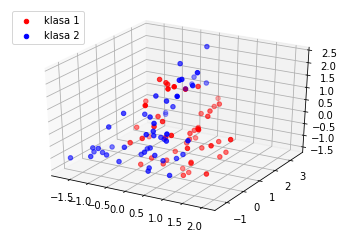

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
clas1=1
clas2=2
samplesPerClas=50

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train[train[54]==clas1][0].head(samplesPerClas).to_numpy(), train[train[54]==clas1][9].head(samplesPerClas).to_numpy(), 
           train[train[54]==clas1][5].head(samplesPerClas).to_numpy(), color='red', label='klasa 1')
ax.scatter(train[train[54]==clas2][0].head(samplesPerClas).to_numpy(), train[train[54]==clas2][9].head(samplesPerClas).to_numpy(), 
           train[train[54]==clas2][5].head(samplesPerClas).to_numpy(), color='blue', label='klasa 2')
plt.legend(loc=2)

In [10]:
#ad. 6 Walidacja krzyżowa
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import DistanceMetric

train_train=train.iloc[:, [0,9,5]].to_numpy()
y_train_train = train.iloc[:, [54]].to_numpy().ravel()
test_test=test.iloc[:, [0,9,5]].to_numpy()
y_test_test=test.iloc[:, [54]].to_numpy().ravel()

In [11]:
nn = KNeighborsClassifier(n_neighbors = 1)
NNavg = np.average(cross_val_score( nn, train_train, y_train_train))

In [12]:
KNN3 = KNeighborsClassifier(n_neighbors = 3)
KNN3avg = np.average(cross_val_score( KNN3, train_train, y_train_train))

In [13]:
KNN5 = KNeighborsClassifier(n_neighbors = 5)
KNN5avg = np.average(cross_val_score( KNN5, train_train, y_train_train))

In [14]:
KNN10 = KNeighborsClassifier(n_neighbors = 10)
KNN10avg = np.average(cross_val_score(KNN10, train_train, y_train_train))

In [15]:
NME = NearestCentroid(metric='euclidean')
NMEavg = np.average(cross_val_score( NME, train_train, y_train_train))

In [16]:
#ad. 6 Analiza wyników, wybór metody klasyfikacji

In [17]:
print("Dla metody NN wynik sprawdzianu krzyżowego to ", NNavg,  ".")
print("Dla metody kNN, dla k=3, wynik sprawdzianu krzyżowego to ", KNN3avg,  ".")
print("Dla metody kNN, dla k=5, wynik sprawdzianu krzyżowego to ", KNN5avg,  ".")
print("Dla metody kNN, dla k=10, wynik sprawdzianu krzyżowego to ", KNN10avg,  ".")
print("Dla metody NME wynik sprawdzianu krzyżowego to ", NMEavg,  ".")

Dla metody NN wynik sprawdzianu krzyżowego to  0.8360584572681029 .
Dla metody kNN, dla k=3, wynik sprawdzianu krzyżowego to  0.8510701980863706 .
Dla metody kNN, dla k=5, wynik sprawdzianu krzyżowego to  0.8543300266226547 .
Dla metody kNN, dla k=10, wynik sprawdzianu krzyżowego to  0.8478585616694415 .
Dla metody NME wynik sprawdzianu krzyżowego to  0.4136782069199871 .


Na tej podstawie możemy stwierdzić, że to właśnie metoda kNN, z k=5 jest najlepsza dla danego zbioru danych.

In [18]:
#ad. 7 Test modelu na zbiorze testowym
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(train_train, y_train_train)
model.predict(test_test)
s = model.score(test_test, y_test_test)

In [19]:
s

0.8582851989287656

In [20]:
#ad. 8 Wnioski

1. Normalizacja sprawia, że sprowadzamy wszystkie dane do jednej wspólnej skali, dzięki czemu dają nam one lepsze informacje, a co za tym idzie klasyfikacja ma większe szanse na powodzenie.
2. Selekcja cech jest bardzo istotna, pozwala na efektywniejsze wykorzystanie danych
3. Dla danego zbioru danych najlepszą metodą klasyfikacji okazała się metoda k-najbliższych sąsiadów, przy k=5

Przygotowali Matuesz Pietrzykowski 233993 Błazej Poniatowski 233996